Importing packages/libraries:

In [25]:
# Magic command to enable the visualisation of plots directly within the notebook
%matplotlib inline
# Import the NumPy library with alias np for working with arrays and carrying out computations
import numpy as np
# Import the random module from NumPy for generating random numbers
from numpy import random
# Import the Pandas library with alias pd for data manipulation and analysis
import pandas as pd
# Import the Seaborn library for data visualisation with alias sns and set seaborn to the default style
import seaborn as sns; sns.set()
# Import the Pyplot module from the Matplotlib library with alias plt to provide an interface for creating visualisations
import matplotlib.pyplot as plt
# Import KNN, logistic regression and naive bayes (with multinomial distrubtion) machine learning models from the SciKit-Learn library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
# Import functions for splitting data into training and testing, and for cross validation from SciKit-Learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# Import metrics for evaluating machine learning models, namely confusion matrix and its display, and ROC-AUC score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
# Import the tabulate function from the Tabulate library for formatting and printing tables in a readable way
from tabulate import tabulate;

Loading and printing the dataset:

In [26]:
# Read csv file and convert to a pandas dataframe
df = pd.read_csv("dataset_assignment1.csv")
# Create a new dataframe object
data = pd.DataFrame(df)
# Covert to an array and store in a new variable for data preprocessing
arr = data.to_numpy()
# Print data information to notebook in a tabular format
print(data)

     feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0           5         1         1         1         2         1         3   
1           5         4         4         5         7        10         3   
2           3         1         1         1         2         2         3   
3           6         8         8         1         3         4         3   
4           4         1         1         3         2         1         3   
..        ...       ...       ...       ...       ...       ...       ...   
695         2         1         1         1         2         1         1   
696         5        10        10         3         7         3         8   
697         4         8         6         4         3         4        10   
698         4         8         8         5         4         5        10   
699         3         1         1         1         2         1         3   

     feature8  feature9  class  
0           1         1      0  
1        

Understanding the dataset:

In [27]:
# Print the number of samples for each unique class in the dataframe
print(data["class"].value_counts())

0    459
1    241
Name: class, dtype: int64


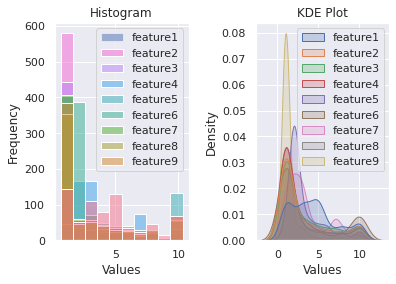

In [28]:
# Copy the database and store this as a new dataframe, so that the dataframe can be modified without affecting the original dataframe 
data_copy = data.copy()
# Remove the last column from data_copy in place so that there is a version of the data without the class labels for use in the visualisations
data_copy.drop(columns=data.columns[-1],axis=1,inplace=True)
# Set the color palette for the histograms
palette = sns.color_palette("husl", len(data_copy.columns))
# Create a figure with two subplots so that the histogram and kde can be compared visually. Specify that we want one row and two columns
fig, (ax1, ax2) = plt.subplots(1, 2)
# Plot the histograms for each column with the respective color and label
hist = sns.histplot(data=data_copy, shrink=3,kde=False, palette=palette, alpha=0.5, multiple="layer", edgecolor="white",ax=ax1)
# Add a legend to the plot
ax1.legend(labels=data_copy.columns)
# Add a title to the histogram (first subplot)
ax1.set_title('Histogram')
# Add a label for the x-axis to the histogram
ax1.set_xlabel('Values')
# Add a label for the y-axis to the histogram
ax1.set_ylabel('Frequency')
# Plot a kernal density estimate for each column in data_copy on the second subplot
kde = sns.kdeplot(data=data_copy,fill=True,ax=ax2)
# Add a title to the KDE plot (second subplot)
ax2.set_title('KDE Plot')
# Add a label for the x-axis of the kde
ax2.set_xlabel('Values')
# Add a label for the y-axis of the kde
ax2.set_ylabel('Density')
# Add the histogram to the first subplot
hist.plot(ax=ax1)
# Add the kde plot to the second subplot
kde.plot(ax=ax2)
# Adjust the position of the subplots to prevent overlapping
fig.subplots_adjust(wspace=0.5)
# Display the figure with the subplots
plt.show()

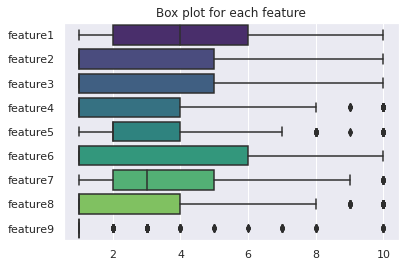

In [29]:
# Plot a horizontal box plot of each column in data_copy using seaborn
sns.boxplot(data=data_copy,orient="h",palette="viridis")
# Add a title to the box plot
plt.title("Box plot for each feature")
# Display the plot
plt.show()

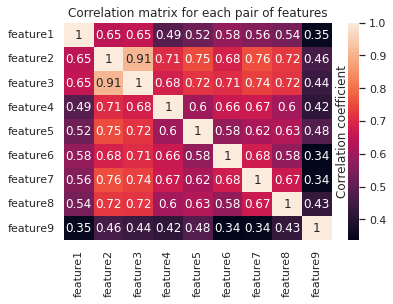

In [30]:
# Calculate the correlation coefficients between each pair of columns and store as a dataframe
corr_matrix = data_copy.corr()
# Create a heatmap plot of the correlation coefficients, with the values displayed on the plot
sns.heatmap(corr_matrix, annot=True)
# Add a title to the plot
plt.title("Correlation matrix for each pair of features")
# Get the current Axes instance
ax = plt.gca()
# Add a label for the y-axis of the plot
plt.ylabel("Correlation coefficient")
# Set the position of the y-axis label to the right side of the plot
ax.yaxis.set_label_position('right')
# Display the plot
plt.show()

Statistical description of features for each class:



In [31]:
# Create a dataframe with samples just belonging to class 0
class0 = data.loc[data["class"] == 0]
# Create a dataframe with samples just belonging to class 1
class1 = data.loc[data["class"] == 1]
# Initialise a variable corresponding to the class number in order to iterate through each class
classname = 0
# Iterate through the dataframes with values pertaining to a single particular class
for dataset in [class0,class1]:
    # Print the class name of the current class being processed 
    print(f"\nClass{classname}\n")
    # Increment the classname variable so that the next header printed will indicate the next class
    classname += 1
    # Initialise an empty list to store the data for the table
    data = []
    # Create a list of headings for the statistical measures that will be computed 
    col_names = ["Feature","Mean","Median","Max","Min","Mode","Standard deviation","Variance"]
    # Iterate through each column, except the last one which has the class label. Compute various statistical measures for each feature column.
    for col in dataset.columns[:-1]:
      # Compute various statistical measures for the current feature, including the mean, median, maximum, minimum, mode, standard deviation and variance
      feat_name = f"{col}"
      mean = f"{np.mean(dataset[col]):.2f}"
      median = np.median(dataset[col])
      max_ = np.amax(dataset[col])
      min_ = np.amin(dataset[col])
      mode = dataset[col].mode()[0]
      sd = f"{np.std(dataset[col]):.2f}"
      var = f"{np.var(dataset[col]):.2f}"
      # Append the feature name and statistical measures to the data list as a list
      data.append([feat_name, mean, median, max_, min_, mode, sd, var])
    # Create a table using the data list, headers from col_names and format it as a grid
    table = tabulate(data,headers=col_names,tablefmt="grid")
    # Print the tabulate object
    print(table)


Class0

+-----------+--------+----------+-------+-------+--------+----------------------+------------+
| Feature   |   Mean |   Median |   Max |   Min |   Mode |   Standard deviation |   Variance |
+===========+========+==========+=======+=======+========+======================+============+
| feature1  |   2.96 |        3 |     8 |     1 |      1 |                 1.67 |       2.79 |
+-----------+--------+----------+-------+-------+--------+----------------------+------------+
| feature2  |   1.32 |        1 |     9 |     1 |      1 |                 0.91 |       0.82 |
+-----------+--------+----------+-------+-------+--------+----------------------+------------+
| feature3  |   1.44 |        1 |     8 |     1 |      1 |                 1    |       0.99 |
+-----------+--------+----------+-------+-------+--------+----------------------+------------+
| feature4  |   1.36 |        1 |    10 |     1 |      1 |                 0.99 |       0.99 |
+-----------+--------+----------+-------+

Preparing data for classification:

In [32]:
# Set the set for the random number generator to ensure reproducibility
random.seed(0)
# Randomly shuffle the order of the rows in the array
random.shuffle(arr)
# Create a list of object series including all the feature values but not the class label
X = [i[:-1] for i in arr]
# Create a list of labels
y = [i[-1] for i in arr]
# Split the data into 80% training and 20% testing sets and assign to four variables
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2);

Creating some useful functions to use in training and testing:

In [33]:
def compute_scores(pred: list, true: list):
  """
  A function used to calculate several evaluation scores for classifiers. It takes lists as inputs and converts them into arrays for computation. 
  Parameters: pred (list), which contains the predicted class labels from a model; true (list), which contains the actual class labels from the data. 
  Returns: 5 floats (accuracy, precision, recall, f1score, rocauc) which contain the scores for each respective measure.  
  """
  # Convert the predicted labels list to an array
  y_pred = np.array(pred)
  # Convert the true labels list to an array
  y_true = np.array(true)
  # Create a boolean mask for the positive class
  positive_mask = y_true == 1

  # Count the number of elements in the positive class 
  positive = np.count_nonzero(positive_mask)
  # Count True Positive
  tp = np.count_nonzero(y_pred[positive_mask]==1)
  # Count False Negative
  fn = np.count_nonzero(y_pred[positive_mask]==0)

  # Create a boolean mask for the negative class
  negative_mask = y_true == 0

  # Count the number of elements in the negative class 
  negative = np.count_nonzero(negative_mask)
  # Count False Positive
  fp = np.count_nonzero(y_pred[negative_mask]==1)
  # Count True Negative
  tn = np.count_nonzero(y_pred[negative_mask]==0)
  # Compute Accuracy, Precision, Recall, F1-score, and roc-auc score
  accuracy = np.round(((tp + tn)/(tp + tn + fp + fn)),2)
  precision = np.round((tp/(tp + fp)),2)
  recall = np.round((tp/(tp + fn)),2)
  f1score = np.round((2*precision*recall/(precision + recall)),2)
  rocauc = np.round(roc_auc_score(y_true,y_pred),2)
  # Return the 5 evaluation measures
  return accuracy, precision, recall, f1score, rocauc
  
def create_confusion_matrix(classifier: str,y_pred: list, y_true:list):
  "This function takes a string representing the classifier and two lists as arguments and returns nothing. It displays a confusion matrix when called."
  #Create the confusion matrix object
  cm = confusion_matrix(y_true, y_pred)
  #Set the plot style to white
  plt.style.use('default')
  #Create the plot and set the color scheme
  disp = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
  disp.plot(cmap=plt.cm.Blues)
  #Remove the gridlines
  plt.grid(False)
  #Set the title and axis labels
  plt.title(f"{classifier} Confusion Matrix")
  plt.xlabel("Predicted label")
  plt.ylabel("True label")
  #Show the plot
  plt.show()

def create_scores_table(classifier,accuracy, precision, recall, f1score, rocauc):
  """
  This function is used to visualise the evaluation scores for a classifier into a table. 
  It takes the evaluation scores and a string to represent the type of classifier as inputs and creates a tabulate object, which it prints under a heading. It returns nothing.
  """
  # Prepare the scores with their evaluation name as data for the table into a list of lists
  data = [["Accuracy", accuracy],["Precision", precision],["Recall", recall],["f1-score", f1score],["ROC-AUC",rocauc]]
  # Prepare the column names in a list
  col_names = ["Measure","Result"]
  # Create a tabulate object in the grid format with the data list and col_names as column headers
  table = tabulate(data, headers=col_names, tablefmt="grid")
  # Print the name of the classifier as a heading
  print(f"{classifier} evaluation")
  # Print the table 
  print(table)

def overall_table(acc1,prec1,rec1,f1,ra1,acc2,prec2,rec2,ra2,f2,acc3,prec3,rec3,f3,ra3):
  """
  This function is used to amalgamate the evaluation scores from the three classifiers into one table. 
  It takes their scores as input (in the same order as the classifiers are trained) and creates a tabulate object, which it prints under a heading. It returns nothing.
  """
  # Prepare the scores with their respective evaluation name for each classifier
  data = [["Accuracy",acc1,acc2,acc3],["Precision",prec1,prec2,prec3],["Recall",rec1,rec2,rec3],["F1-score",f1,f2,f3],["ROC-AUC",ra1,ra2,ra3]]
  # Prepare the column names in a list of the names of each classifier type
  col_names = ["KNN","Naïve Bayes", "Logistic Regression"]
  # Create the tabulate object in the grid format with the data list and col_names list
  table = tabulate(data,headers=col_names,tablefmt="grid")
  # Print a header for the table
  print(f"Evaluation and comparison across all classifiers")
  # Print the table
  print(table)

def cross_validate(classifier,parameter):
  """
  A function which erforms k-fold cross-validation using different evaluation metrics to assess the performance of a given classifier 
  for a specified parameter value. Stores the mean scores for each metric in global lists. These lists are then used in tune_param().
  Parameters: classifier (object), an instance of a classification model; parameter (any), the value of the parameter to be tuned.
  Returns: None 
  """
  # Use the 'global' keyword to specify that the following variables refer to the global variables defined outside of this function.
  global acc, prec, rec, f, roc_auc
  # Perform k-fold cross valudation using accuracy
  accuracy = cross_val_score(classifier,X_train,y_train,cv=5,scoring='accuracy')
  # Caclulate the mean accuracy score from the different folds
  acc.append((parameter,accuracy.mean()))
  # Perform k-fold cross valudation using precision
  precision = cross_val_score(classifier,X_train,y_train,cv=5,scoring='precision')
  # Caclulate the mean accuracy score from the different folds
  prec.append((parameter,precision.mean()))
  # Perform k-fold cross valudation using recall
  recall = cross_val_score(classifier,X_train,y_train,cv=5,scoring='recall')
  # Calculate the mean accuracy score from the different folds
  rec.append((parameter,recall.mean()))
  # Perform k-fold cross valudation using F1
  fscore = cross_val_score(classifier,X_train,y_train,cv=5,scoring='f1')
  # Calculate the mean accuracy score from the different folds
  f.append((parameter,fscore.mean()))
  # Perform k-fold cross valudation using ROC-AUC score
  ROC_AUC = cross_val_score(classifier,X_train,y_train,cv=5,scoring='roc_auc')
  # Calculate the mean ROC-AUC score from the different folds
  roc_auc.append((parameter,ROC_AUC.mean()))

def tune_param(acc:list, prec:list,rec:list,F1:list,roc_auc:list,parameter_list):
  """
  Given the lists of evaluation scores for different parameter values (acc, prec, rec, F1, roc_auc) and a list of the corresponding parameter values (parameter_list),
  returns a tuple containing the optimal parameter value for each evaluation measure (accurate_param, precise_param, recall_param, f_param, roc_auc_param) and the total
  scores obtained for each parameter value by each evaluation measure (acc_scores, prec_scores, rec_scores, F1_scores, roc_auc_scores).
    
  Parameters:
      acc (list): List of tuples containing the parameter value and the accuracy score for that value.
      prec (list): List of tuples containing the parameter value and the precision score for that value.
      rec (list): List of tuples containing the parameter value and the recall score for that value.
      F1 (list): List of tuples containing the parameter value and the F1 score for that value.
      roc_auc (list): List of tuples containing the parameter value and the ROC-AUC score for that value.
      parameter_list (list): List of the parameter values used to obtain the scores.
    
  Returns:
      A tuple containing:
      - a list of the optimal parameter value for each evaluation measure, in the following order: accurate_param, precise_param, recall_param, f_param, roc_auc_param.
      - a list of the total accuracy scores obtained for each parameter value.
      - a list of the total precision scores obtained for each parameter value.
      - a list of the total recall scores obtained for each parameter value.
      - a list of the total F1 scores obtained for each parameter value.
      - a list of the total ROC-AUC scores obtained for each parameter value.
  """
  # Create a list of the accuracies
  acc_scores = [p[1] for p in acc]
  # Create a list of the precision scores
  prec_scores = [p[1] for p in prec]
  # Create a list of the recall scores
  rec_scores = [p[1] for p in rec]
  # Create a list of the F1 scores
  F1_scores = [p[1] for p in f]
  # Create a list of the ROC-AUC scores
  roc_auc_scores = [p[1] for p in roc_auc]
  # Find the k-value that gives the highest mean accuracy score
  accurate_param = parameter_list[np.argmax(acc_scores)]
  # Find the k-value that gives the best mean precision score
  precise_param = parameter_list[np.argmax(prec_scores)]
  # Find the k-value that gives the best mean recall score
  recall_param = parameter_list[np.argmax(rec_scores)]
  # Find the k-value that gives the best mean F1 score
  f_param = parameter_list[np.argmax(F1_scores)]
  # Find the k-value that gives the best mean ROC-AUC score
  roc_auc_param = parameter_list[np.argmax(roc_auc_scores)]
  # Create a list of all the optimal parameters according to the different measures (as measures may differ in which parameter value they favour)
  optimal_params = [accurate_param, precise_param, recall_param, f_param, roc_auc_param]
  # Return the list of optimal parameters according to the evaluation measures, and the extracted total scores for all parameter values by each evaluation measure
  return optimal_params, acc_scores, prec_scores, rec_scores, F1_scores, roc_auc_scores

# Classification method 1: KNN

####Fine-tuning hyperparameters

Best k according to:
Accuracy = 13 
Precision = 4 
Recall = 13 
f1-score = 13 
ROC-AUC score = 14


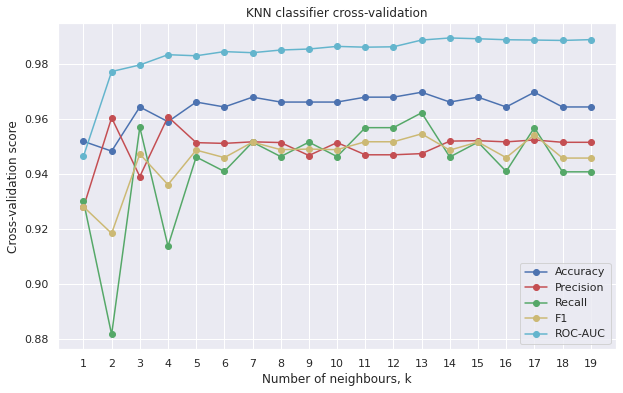

In [34]:
# Create a list of k values to be tested from 1 to 19
k_vals = [k for k in range(1,20)]
# Initialise several empty lists to store the cross-validation scores for each k-value and evaluation measure 
acc = []
prec = []
rec = []
f = []
roc_auc = []

#Loop through each k-value
for k in range(1,20):
  #Create a KNN classifier object for each k-value
  KNN_classifier = KNeighborsClassifier(n_neighbors=k)
  #Call the cross validation function to add scores to the scoring lists 
  cross_validate(KNN_classifier,k)

#Call the tune_param function to give the optimal k for each evaluation method and the list of scores corresponding to each k value for each measure 
optimal_ks, k_acc_scores, k_prec_scores, k_rec_scores, k_F1_scores, k_roc_auc_scores = tune_param(acc, prec,rec,f,roc_auc,k_vals)
# Print the optimal values to screen
print(f"Best k according to:\nAccuracy = {optimal_ks[0]} \nPrecision = {optimal_ks[1]} \nRecall = {optimal_ks[2]} \nf1-score = {optimal_ks[3]} \nROC-AUC score = {optimal_ks[4]}")

# Create a figure to allow the plots for each evaluation metric to be plotted over each other
plt.figure(figsize=(10, 6))
# Create a plot for each evaluation measure with a different line colour
plt.plot(k_vals,k_acc_scores,'-o',label=f"Accuracy")
plt.plot(k_vals,k_prec_scores,'-ro',label=f"Precision")
plt.plot(k_vals,k_rec_scores,'-go',label=f"Recall")
plt.plot(k_vals,k_F1_scores,'-yo',label=f"F1")
plt.plot(k_vals,k_roc_auc_scores,'-co',label=f"ROC-AUC")
# Add a label to the x-axis and y-axis
plt.xlabel("Number of neighbours, k")
plt.ylabel("Cross-validation score")
# Adds labels to the x-axis based on the k-vals list
plt.xticks(k_vals)
# Add a title to the figure
plt.title(f"KNN classifier cross-validation")
# Add a legend showing which colour graph corresponds to which evaluation measure
plt.legend()
# Display the plots in the figure
plt.show()

####Training

In [35]:
# Create a KNN classifier instance with number of neighbours set to 7
knn = KNeighborsClassifier(n_neighbors=7)
# Train the KNN classifier on the training data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

####Testing

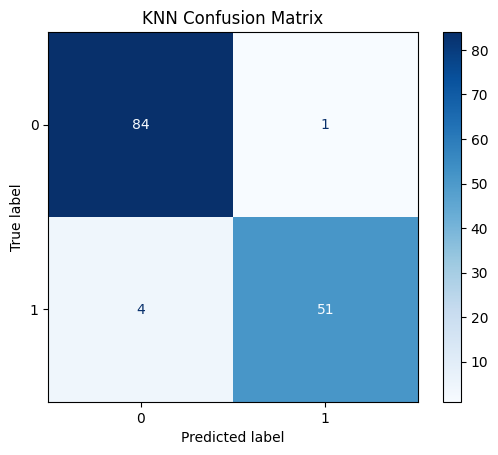

KNN evaluation
+-----------+----------+
| Measure   |   Result |
+===========+==========+
| Accuracy  |     0.96 |
+-----------+----------+
| Precision |     0.98 |
+-----------+----------+
| Recall    |     0.93 |
+-----------+----------+
| f1-score  |     0.95 |
+-----------+----------+
| ROC-AUC   |     0.96 |
+-----------+----------+


In [36]:
#Convert from an array into a list to match y_test data structure
KNN_y_pred = list(knn.predict(X_test))
# Evaluate the KNN classifier
KNNaccuracy, KNNprecision, KNNrecall, KNNfscore, KNNrocauc = compute_scores(KNN_y_pred,y_test)
# Create and print the KNN confusion matrix
create_confusion_matrix("KNN",KNN_y_pred,y_test)
# Create and print a scoring table summarising the evaluation measures
create_scores_table("KNN",KNNaccuracy, KNNprecision, KNNrecall, KNNfscore,KNNrocauc)

# Classification method 2: Naïve Bayes

####Fine-tuning hyperparameters

Best alpha according to:
Accuracy = 1e-07 
Precision = 1e-07 
Recall = 1e-07 
f1-score = 1e-07 
ROC-AUC score = 1e-07


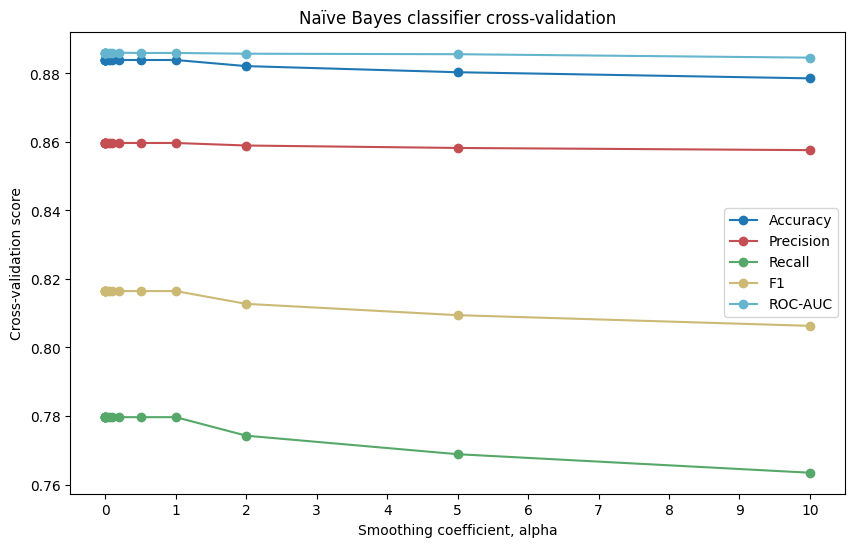

In [37]:
# Create a list of logarithmically increasing smoothing values (alpha)
alpha_vals = [0.0000001,0.000001,0.00001,0.0001,0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10]
# Initialise several empty lists to store the cross-validation scores for each k-value and evaluation measure 
acc = []
prec = []
rec = []
f = []
roc_auc = []

# Loop through each parameter value in the list
for a in alpha_vals:
  # Create a Naive Bayes classifier object for each alpha value
  bayes = MultinomialNB(alpha=a)
  # Call the cross validation function to add scores to the scoring lists 
  cross_validate(bayes,a)
# Call the tune_param function to give the optimal alpha for each evaluation method and the list of scores corresponding to each alpha for each measure 
optimal_as, a_acc_scores, a_prec_scores, a_rec_scores, a_F1_scores, a_roc_auc_scores = tune_param(acc, prec,rec,f,roc_auc,alpha_vals)
# Print the optimal values to screen
print(f"Best alpha according to:\nAccuracy = {optimal_as[0]} \nPrecision = {optimal_as[1]} \nRecall = {optimal_as[2]} \nf1-score = {optimal_as[3]} \nROC-AUC score = {optimal_as[4]}")

# Create a figure to allow the plots for each evaluation metric to be plotted over each other
plt.figure(figsize=(10, 6))
# Plot each evaluation measure with a different colour
plt.plot(alpha_vals,a_acc_scores,'-o',label=f"Accuracy")
plt.plot(alpha_vals,a_prec_scores,'-ro',label=f"Precision")
plt.plot(alpha_vals,a_rec_scores,'-go',label=f"Recall")
plt.plot(alpha_vals,a_F1_scores,'-yo',label=f"F1")
plt.plot(alpha_vals,a_roc_auc_scores,'-co',label=f"ROC-AUC")
# Label the x- and y-axis
plt.xlabel("Smoothing coefficient, alpha")
plt.ylabel("Cross-validation score")
# Generate the scale for the x-axis
plt.xticks(range(0,11))
# Add the figure title
plt.title(f"Naïve Bayes classifier cross-validation")
# Add a legend to differentiate between each score
plt.legend()
# Display the plot
plt.show()

#### Training

In [38]:
# Create a naive bayes classifier object with a multinomial distribution and smoothing coefficient of 0.001
bayes = MultinomialNB(alpha=0.001)
# Train the classifier on the training data
bayes.fit(X_train,y_train)

MultinomialNB(alpha=0.001)

####Testing


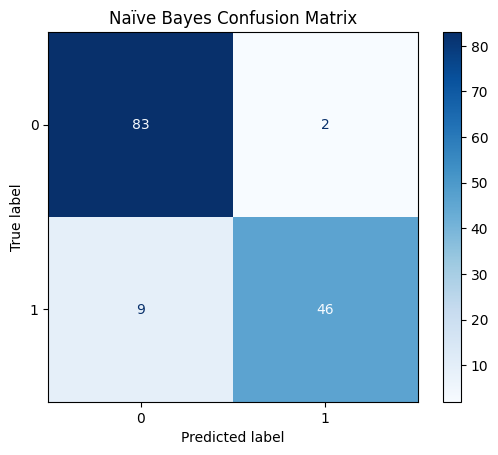

Naïve Bayes evaluation
+-----------+----------+
| Measure   |   Result |
+===========+==========+
| Accuracy  |     0.92 |
+-----------+----------+
| Precision |     0.96 |
+-----------+----------+
| Recall    |     0.84 |
+-----------+----------+
| f1-score  |     0.9  |
+-----------+----------+
| ROC-AUC   |     0.91 |
+-----------+----------+


In [39]:
#Convert from an array into a list to match y_test data structure
bayes_y_pred = list(bayes.predict(X_test))
# Evaluate the naive bayes classifier
NBaccuracy, NBprecision, NBrecall, NBfscore, NBrocauc = compute_scores(bayes_y_pred,y_test)
# Create and print the naive bayes confusion matrix
create_confusion_matrix("Naïve Bayes",bayes_y_pred,y_test)
# Create and print a scoring table summarising the evaluation measures
create_scores_table("Naïve Bayes",NBaccuracy, NBprecision, NBrecall, NBfscore,NBrocauc)

# Classification method 3: Logistic Regression

####Fine-tuning paramaters




Best regularisation term according to:
Accuracy = l2 
Precision = l2 
Recall = l1 
f1-score = l2 
ROC-AUC score = l1


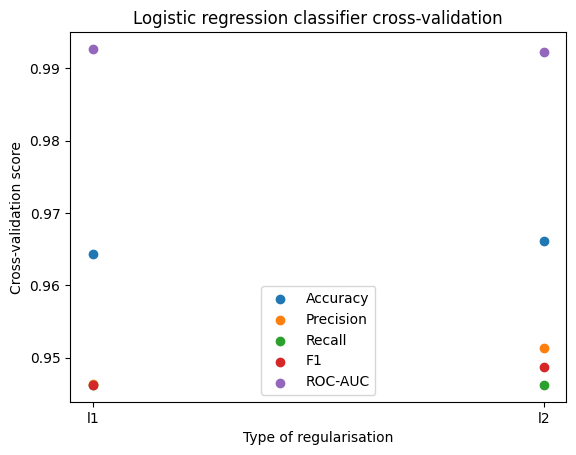

In [40]:
# Create a list of the two regularisation terms to be tested
reg_vals = ["l1","l2"]
# Initialise several empty lists to store the cross-validation scores for each k-value and evaluation measure 
acc = []
prec = []
rec = []
f = []
roc_auc = []

# Iterate through the regularisation terms to test
for term in reg_vals:
  # Create a logistic regression classifier object for each type of regularisation
  log = LogisticRegression(penalty=term,solver='liblinear')
  # Call the cross validation function to add scores to the scoring lists 
  cross_validate(log,term)

# Call the tune_param function to give the optimal k for each evaluation method and the list of scores corresponding to each k value for each measure 
optimal_regs, reg_acc_scores, reg_prec_scores, reg_rec_scores, reg_F1_scores, reg_roc_auc_scores = tune_param(acc, prec,rec,f,roc_auc,reg_vals)

# Print the optimal values to screen
print(f"Best regularisation term according to:\nAccuracy = {optimal_regs[0]} \nPrecision = {optimal_regs[1]} \nRecall = {optimal_regs[2]} \nf1-score = {optimal_regs[3]} \nROC-AUC score = {optimal_regs[4]}")

# Create a list of the (lists of) scores for different evaluation measures
scores = [reg_acc_scores,reg_prec_scores,reg_rec_scores,reg_F1_scores,reg_roc_auc_scores]
# Create a new figure and axes object for plotting so that multiple plots can be displayed at once
fig, ax = plt.subplots()
# Iterate over tuples of the score list and its index
for i, score in enumerate(scores):
    # Create a scatter plot for each evaluation method
    ax.scatter(reg_vals, score, label=["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"][i])
# Add labels to the x- and y-axis
plt.xlabel("Type of regularisation")
plt.ylabel("Cross-validation score")
# Set the values on the x-axis to be the different types of regularisation
plt.xticks(reg_vals)
# Add a title and legend of the different evaluation measures
plt.title(f"Logistic regression classifier cross-validation")
plt.legend()
# Display the figure
plt.show()

####Training

In [41]:
# Create a logistic regression classifier instance with an l2 regularisation penalty 
logres = LogisticRegression(penalty="l2",solver="liblinear")
# Train the classifier on the training data
logres.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

Testing

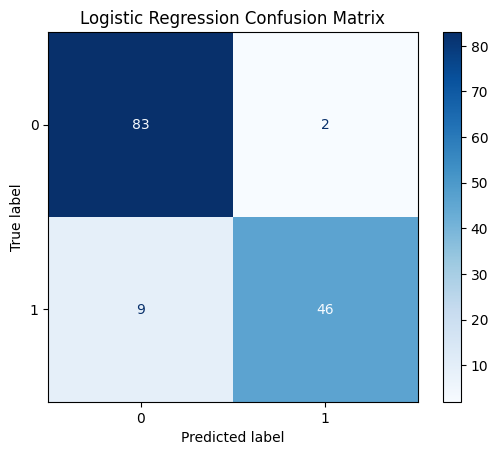

Logistic Regression evaluation
+-----------+----------+
| Measure   |   Result |
+===========+==========+
| Accuracy  |     0.92 |
+-----------+----------+
| Precision |     0.96 |
+-----------+----------+
| Recall    |     0.84 |
+-----------+----------+
| f1-score  |     0.9  |
+-----------+----------+
| ROC-AUC   |     0.91 |
+-----------+----------+


In [42]:
# Convert from an array into a list to match y_test data structure
logres_y_pred = list(bayes.predict(X_test))
# Evaluate the classifier 
logresaccuracy, logresprecision, logresrecall, logresfscore, logresrocauc = compute_scores(logres_y_pred,y_test)
# Create and print the confusion matrix for the classifier
create_confusion_matrix("Logistic Regression",logres_y_pred,y_test)
# Create and print a scoring table summarising the evaluation scores
create_scores_table("Logistic Regression",logresaccuracy, logresprecision, logresrecall, logresfscore,logresrocauc)

In [43]:
# Create and print a table which compares the three classifiers across all evaluation measures
overall_table(KNNaccuracy, KNNprecision, KNNrecall, KNNfscore,KNNrocauc,NBaccuracy, NBprecision, NBrecall, NBfscore,NBrocauc,logresaccuracy, logresprecision, logresrecall, logresfscore,logresrocauc)

Evaluation and comparison across all classifiers
+-----------+-------+---------------+-----------------------+
|           |   KNN |   Naïve Bayes |   Logistic Regression |
+===========+=======+===============+=======================+
| Accuracy  |  0.96 |          0.92 |                  0.92 |
+-----------+-------+---------------+-----------------------+
| Precision |  0.98 |          0.96 |                  0.96 |
+-----------+-------+---------------+-----------------------+
| Recall    |  0.93 |          0.84 |                  0.84 |
+-----------+-------+---------------+-----------------------+
| F1-score  |  0.95 |          0.91 |                  0.9  |
+-----------+-------+---------------+-----------------------+
| ROC-AUC   |  0.96 |          0.9  |                  0.91 |
+-----------+-------+---------------+-----------------------+
